# Recommendation Systems Assignment

### MIE451/1513 UofT

## Imports

In [1]:
# import required libraries
import os
import os.path
import numpy as np
import pandas as pd
from math import sqrt
from heapq import nlargest
from tqdm import trange
from tqdm import tqdm
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import mean_squared_error

## Support functions and variables

In [2]:
#!unzip ml-100k.zip -d .

In [3]:
MOVIELENS_DIR = "ml-100k"

In [4]:
!ls {MOVIELENS_DIR}

README
allbut.pl
mku.sh
u.data
u.genre
u.info
u.item
u.occupation
u.user
u1.base
u1.test
u2.base
u2.test
u3.base
u3.test
u4.base
u4.test
u5.base
u5.test
ua.base
ua.test
ub.base
ub.test


In [5]:
def getData(folder_path, file_name):
    fields = ['userID', 'itemID', 'rating', 'timestamp']
    data = pd.read_csv(os.path.join(folder_path, file_name), sep='\t', names=fields)
    return data 

In [6]:
rating_df = getData(MOVIELENS_DIR, 'u.data')

In [7]:
num_users = len(rating_df.userID.unique())
num_items = len(rating_df.itemID.unique())
print("Number of users:", num_users)
print("Number of items:", num_items)

Number of users: 943
Number of items: 1682


In [8]:
rating_df.head()

,userID,itemID,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [10]:
rating_df[rating_df>5]

,userID,itemID,rating,timestamp
0,196.0,242.0,NaN,881250949
1,186.0,302.0,NaN,891717742
2,22.0,377.0,NaN,878887116
3,244.0,51.0,NaN,880606923
4,166.0,346.0,NaN,886397596
5,298.0,474.0,NaN,884182806
6,115.0,265.0,NaN,881171488
7,253.0,465.0,NaN,891628467
8,305.0,451.0,NaN,886324817
9,6.0,86.0,NaN,883603013


In [12]:
rating_matrix = rating_df.as_matrix()

In [13]:
rating_matrix[rating_matrix>5]

array([      196,       242, 881250949, ...,        12,       203,
       879959583], dtype=int64)

## Q1

### (a)

In [266]:
def dataPreprocessor(rating_df, num_users, num_items):
    """
        INPUT: 
            data: pandas DataFrame. columns=['userID', 'itemID', 'rating' ...]
            num_row: int. number of users
            num_col: int. number of items
            
        OUTPUT:
            matrix: 2D numpy array. row IDs are (userID-1), columns IDs are (itemID-1),
            and the rating for (userID,itemID,rating) is the value at this row and column.  
            Any observed ratings are zero.
            
        NOTE 1: see where something very similar is done in the lab in function 'buildUserItemMatrix'    
            
        NOTE 2: data can have more columns, but your function should ignore 
              additional columns.
              
    """
    matrix = np.zeros((num_users, num_items))
    ########### your code goes here ###########
    for (index, userID, itemID, rating, timestamp) in rating_df.itertuples():
        matrix[userID-1, itemID-1] = rating   
    
    
    ###########         end         ###########
    return matrix

In [267]:
dataPreprocessor(rating_df, num_users, num_items)

array([[ 5.,  3.,  4., ...,  0.,  0.,  0.],
       [ 4.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 5.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  5.,  0., ...,  0.,  0.,  0.]])

### (b)

In [268]:
class BaseLineRecSys(object):
    def __init__(self, method, processor=dataPreprocessor):
        """
            method: string. From ['popularity','useraverage']
            processor: function name. dataPreprocessor by default
        """
        self.method_name = method
        self.method = self._getMethod(self.method_name)
        self.processor = processor
        self.pred_column_name = self.method_name
        
    def _getMethod(self, method_name):
        """
            Don't change this
        """
        switcher = {
            'popularity': self.popularity,
            'useraverage': self.useraverage,
        }
        
        return switcher[method_name]
    
    @staticmethod
    def useraverage(train_matrix, num_users, num_items):
        """
            INPUT:
                train_matrix: 2D numpy array.
                num_users: int. Number of Users.
                num_items: int. Number of Items.
            OUTPUT:
                predictionMatrix: 2D numpy array. this is the same dimensions and 
                row/column IDs as train_matrix, but anywhere there is a 0 in train_matrix, 
                there should be a predicted value in predictedMatrix.
                
            NOTE: see where something very similar is done in the lab in function 'predictByUserAverage'  
            
        """
        
        predictionMatrix = np.zeros((num_users, num_items))
        ########### your code goes here ###########
        for (user,item), rating in np.ndenumerate(train_matrix):
            # Predict rating for every item that wasn't ranked by the user (rating == 0)
            ratedItems = train_matrix[user, :]
            
            # Extract the items the user already rated
            userVector = train_matrix[user, :]
            ratedItems = userVector[userVector.nonzero()]

            # If not empty, calculate average and set as rating for the current item
            if ratedItems.size == 0:
                itemAvg = 0
            else:
                itemAvg = ratedItems.mean()
            predictionMatrix[user, item] = itemAvg

        # report progress every 100 users
            if (user % 100 == 0 and item == 1):
                print ("calculated %d users" % (user,))
              
        
        ###########         end         ###########
        return predictionMatrix
    
    @staticmethod
    def popularity(train_matrix, num_users, num_items):
        """
            INPUT:
                train_matrix: 2D numpy array.
                num_users: int. Number of Users.
                num_items: int. Number of Items.
            OUTPUT:
                predictionMatrix: 2D numpy array. this is the same dimensions and 
                row/column IDs as train_matrix, but anywhere there is a 0 in train_matrix, 
                there should be a predicted value in predictedMatrix.
                
            NOTE: see where something very similar is done in the lab in function 'predictByPopularity'    
        """
        
        predictionMatrix = np.zeros((num_users, num_items))
        ########### your code goes here ###########
        vf = np.vectorize(lambda x: 1 if x >= 4 else 0)

        # For every item calculate the number of people liked (4-5) divided by the number of people that rated
        itemPopularity = np.zeros((num_items))
        for item in range(num_items):
            numOfUsersRated = len(train_matrix[:, item].nonzero()[0])
            numOfUsersLiked = len(vf(train_matrix[:, item]).nonzero()[0])
            if numOfUsersRated == 0:
                itemPopularity[item] = 0
            else:
                itemPopularity[item] = numOfUsersLiked/numOfUsersRated

        for (user,item), rating in np.ndenumerate(train_matrix):
            predictionMatrix[user, item] = itemPopularity[item]
          

            # report progress every 100 users
            if (user % 100 == 0 and item == 1):
                print ("calculated %d users" % (user,))

        ###########         end         ###########
        return predictionMatrix    
    
    def predict_all(self, train_df, num_users, num_items):
        
        train_matrix = self.processor(train_df, num_users, num_items)
        self.__model = self.method(train_matrix, num_users, num_items)
        
    def evaluate_test(self, test_df, copy=False):
        
        if copy:
            prediction = test_df.copy()
        else:
            prediction = test_df
            
        prediction[self.pred_column_name] = np.nan
        
        for (index, 
             userID, 
             itemID) in tqdm(prediction[['userID','itemID']].itertuples()):
            prediction.ix[index, self.pred_column_name] = self.__model[userID-1, itemID-1]

        return prediction
        
    def getModel(self):
        """
            return predicted user-item matrix
        """
        return self.__model
    
    def getPredColName(self):
        """
            return prediction column name
        """
        return self.pred_column_name
    
    def reset(self):
        """
            reuse the instance of the class by removing model
        """
        try:
            self.model = None
        except:
            print("You don not have model..")
            

In [269]:
popularity_recsys = BaseLineRecSys('popularity')

In [270]:
popularity_recsys.predict_all(rating_df, num_users, num_items)

calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


In [271]:
popularity_recsys.getModel()

array([[ 0.71017699,  0.38931298,  0.37777778, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.71017699,  0.38931298,  0.37777778, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.71017699,  0.38931298,  0.37777778, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.71017699,  0.38931298,  0.37777778, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.71017699,  0.38931298,  0.37777778, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.71017699,  0.38931298,  0.37777778, ...,  0.        ,
         0.        ,  0.        ]])

In [272]:
rating_df.head()

,userID,itemID,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [273]:
popularity_recsys.evaluate_test(rating_df,copy=True).head()

0it [00:00, ?it/s]C:\Users\sx449_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
100000it [01:49, 917.10it/s]


,userID,itemID,rating,timestamp,popularity
0,196,242,3,881250949,0.760684
1,186,302,3,891717742,0.804714
2,22,377,1,878887116,0.076923
3,244,51,2,880606923,0.555556
4,166,346,1,886397596,0.611111


In [274]:
popularity_recsys.evaluate_test(rating_df,copy=True).head()

0it [00:00, ?it/s]C:\Users\sx449_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
100000it [01:48, 918.06it/s]


,userID,itemID,rating,timestamp,popularity
0,196,242,3,881250949,0.760684
1,186,302,3,891717742,0.804714
2,22,377,1,878887116,0.076923
3,244,51,2,880606923,0.555556
4,166,346,1,886397596,0.611111


In [275]:
average_user_rating_recsys = BaseLineRecSys('useraverage')

In [276]:
average_user_rating_recsys.predict_all(rating_df, num_users, num_items)

calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


In [277]:
average_user_rating_recsys.getModel()

array([[ 3.61029412,  3.61029412,  3.61029412, ...,  3.61029412,
         3.61029412,  3.61029412],
       [ 3.70967742,  3.70967742,  3.70967742, ...,  3.70967742,
         3.70967742,  3.70967742],
       [ 2.7962963 ,  2.7962963 ,  2.7962963 , ...,  2.7962963 ,
         2.7962963 ,  2.7962963 ],
       ..., 
       [ 4.04545455,  4.04545455,  4.04545455, ...,  4.04545455,
         4.04545455,  4.04545455],
       [ 4.26582278,  4.26582278,  4.26582278, ...,  4.26582278,
         4.26582278,  4.26582278],
       [ 3.41071429,  3.41071429,  3.41071429, ...,  3.41071429,
         3.41071429,  3.41071429]])

In [278]:
average_user_rating_recsys.evaluate_test(rating_df,copy=True).head()

0it [00:00, ?it/s]C:\Users\sx449_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
100000it [01:51, 897.02it/s]


,userID,itemID,rating,timestamp,useraverage
0,196,242,3,881250949,3.615385
1,186,302,3,891717742,3.413043
2,22,377,1,878887116,3.351562
3,244,51,2,880606923,3.651261
4,166,346,1,886397596,3.550000


## Q2

In [279]:
pairwise_distances(np.array([1,2,3,5]).reshape(-1,1), metric='euclidean')

array([[ 0.,  1.,  2.,  4.],
       [ 1.,  0.,  1.,  3.],
       [ 2.,  1.,  0.,  2.],
       [ 4.,  3.,  2.,  0.]])

### (a)

In [280]:
class SimBasedRecSys(object):

    def __init__(self, base, method, processor=dataPreprocessor):
        """
            base: string. From ['user', 'item']. User-based Similarity or Item-based
            method: string. From ['cosine', 'euclidean', 'somethingelse']
            processor: function name. dataPreprocessor by default
        """
        self.base = base
        self.method_name = method
        self.method = self._getMethod(self.method_name)
        self.processor = processor
        self.pred_column_name = self.base+'-'+self.method_name
    
    def _getMethod(self, method_name):
        """
            Don't change this
        """
        switcher = {
            'cosine': self.cosine,
            'euclidean': self.euclidean,
            'somethingelse': self.somethingelse,
        }
        
        return switcher[method_name]
    
    @staticmethod
    def cosine(matrix):
        """
            cosine similarity
        """
        similarity_matrix = 1 - pairwise_distances(matrix, metric='cosine')
        return similarity_matrix
    
    @staticmethod
    def euclidean(matrix):
        """
            euclidean similarity
        
        INPUT
            matrix: same as the rating matrix generated by dataPreprocessor 
            with R rows and C columns.  Outputs an R x R similarity_matrix S 
            where each S_ij should be the euclidean similarity between row i and 
            row j of matrix.
        """
        ########### your code goes here ###########

        similarity_matrix = 1/(pairwise_distances(matrix, metric = 'euclidean') + 1 )
    
        ###########         end         ###########    
        
        return similarity_matrix
    
    @staticmethod
    def somethingelse(matrix):
        """
            manhattan? or super-natural intuition similarity
            
        INPUT
            matrix: same as the rating matrix generated by dataPreprocessor 
            with R rows and C columns.  Outputs an R x R similarity_matrix S 
            where each S_ij should be the somethingelse similarity between row i and 
            row j of matrix.
        """
        ########### your code goes here ###########
        similarity_matrix = 1/(pairwise_distances(matrix, metric = 'manhattan') + 1 )
        
    
        ###########         end         ###########        
        return similarity_matrix
        
    def predict_all(self, train_df, num_users, num_items):
        """
            INPUT: 
                data: pandas DataFrame. columns=['userID', 'itemID', 'rating'...]
                num_row: scalar. number of users
                num_col: scalar. number of items
            OUTPUT:
                no return... this method assigns the result to self.__model
                
                self.__model: this is the same dimensions and row/column IDs as train_matrix, 
                but anywhere there is a 0 in train_matrix, there should be a predicted value 
                in self.__model.
            
            NOTES:
                self.__model should contain predictions for *all* user and items
                (don't worry about predicting for observed (user,item) pairs,
                 since we won't be using these predictions in the evaluation)
                (see 'vectorizedUserSimRecSys' code in for an efficient vectorized example)
                
        """
        train_matrix = self.processor(train_df, num_users, num_items)
        
        if self.base == 'user':
            ########### your code goes here ###########
            temp_matrix = np.zeros(train_matrix.shape)
            temp_matrix[train_matrix.nonzero()] = 1
            uu_similarity = self.method(train_matrix)
            normalizer = np.matmul(uu_similarity, temp_matrix)
            normalizer[normalizer==0] =1e-5
            predictionMatrix = np.matmul(uu_similarity, train_matrix)/normalizer
            
            
            useraverage = np.sum(train_matrix, axis=1)/(np.sum(temp_matrix, axis=1) + 1e-5)
            columns = np.sum(predictionMatrix, axis=0)
            predictionMatrix[:, columns==0] = predictionMatrix[:, columns==0] + np.expand_dims(useraverage, axis=1)
            
        
            self.__model = predictionMatrix
            
            ###########         end         ###########
            
        elif self.base == 'item':
            ########### your code goes here ###########
            train_matrix = train_matrix.T
            temp_matrix = np.zeros(train_matrix.shape)
            temp_matrix[train_matrix.nonzero()] = 1
            ii_similarity = self.method(train_matrix)
            normalizer = np.matmul(ii_similarity, temp_matrix)
            normalizer[normalizer==0] = 1e-5
            predictionMatrix = np.matmul(ii_similarity, train_matrix)/normalizer
            
            itemaverage = np.sum(train_matrix, axis=1)/(np.sum(temp_matrix, axis=1) + 1e-5)
            columns = np.sum(predictionMatrix, axis=0)
            predictionMatrix[:, columns==0] = predictionMatrix[:, columns==0] + np.expand_dims(itemaverage, axis=1)
            
        
            self.__model = predictionMatrix.T
            
            
            
            ###########         end         ###########
        else:
            print('No other option available')
        
    def evaluate_test(self, test_df, copy=False):
        """
            INPUT:
                data: pandas DataFrame. columns=['userID', 'itemID', 'rating'...]
            OUTPUT:
                predictions:  pandas DataFrame. 
                              columns=['userID', 'itemID', 'rating', 'base-method'...]
                              
            NOTE: 1. data can have more columns, but your function should ignore 
                  additional columns.
                  2. 'base-method' depends on your 'base' and 'method'. For example,
                  if base == 'user' and method == 'cosine', 
                  then base-method == 'user-cosine'
                  3. your predictions go to 'base-method' column
        """
        if copy:
            prediction = test_df.copy()
        else:
            prediction = test_df
        prediction[self.pred_column_name] = np.nan
        
        for (index, 
             userID, 
             itemID) in tqdm(prediction[['userID','itemID']].itertuples()):
            prediction.ix[index, self.pred_column_name] = self.__model[userID-1, itemID-1]
    
        return prediction
    
    def getModel(self):
        """
            return predicted user-item matrix
        """
        return self.__model
    
    def getPredColName(self):
        """
            return prediction column name
        """
        return self.pred_column_name
    
    def reset(self):
        """
            reuse the instance of the class by removing model
        """
        try:
            self.model = None
        except:
            print("You do not have model..")

In [281]:
# Examples of how to call similarity functions.
I = np.eye(3)
SimBasedRecSys.cosine(I)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [282]:
SimBasedRecSys.euclidean(I)

array([[ 1.        ,  0.41421356,  0.41421356],
       [ 0.41421356,  1.        ,  0.41421356],
       [ 0.41421356,  0.41421356,  1.        ]])

In [283]:
# Similar to the euclidean distance, but much more sensitive to the outliers, thus sometimes overestimate the distance(disimilarity)
SimBasedRecSys.somethingelse(I)

array([[ 1.        ,  0.33333333,  0.33333333],
       [ 0.33333333,  1.        ,  0.33333333],
       [ 0.33333333,  0.33333333,  1.        ]])

### (b)

- Manhattan Metric
Similar to the euclidean distance, but much more sensitive to the outliers, thus sometimes overestimate the distance(disimilarity)

## Q3

### (a)

In [284]:
user_cosine_recsys = SimBasedRecSys('user','cosine')

user_cosine_recsys.predict_all(rating_df, num_users, num_items)

user_cosine_recsys.getModel()


array([[ 3.89911175,  3.19022667,  3.0261129 , ...,  2.        ,
         3.        ,  3.        ],
       [ 3.84034456,  3.17139889,  2.92626717, ...,  2.        ,
         3.        ,  3.        ],
       [ 3.87104065,  3.12823798,  3.03250708, ...,  2.        ,
         3.        ,  3.        ],
       ..., 
       [ 3.90754645,  3.20227238,  3.05776201, ...,  2.        ,
         3.        ,  3.        ],
       [ 3.91100649,  3.21591021,  2.98854017, ...,  2.        ,
         3.        ,  3.        ],
       [ 3.91593122,  3.24268207,  3.08255897, ...,  0.        ,
         3.        ,  3.        ]])

In [285]:
item_cosine_recsys = SimBasedRecSys('item','cosine')

item_cosine_recsys.predict_all(rating_df, num_users, num_items)

item_cosine_recsys.getModel()


array([[ 3.75429099,  3.66419957,  3.73222997, ...,  3.60248287,
         3.79662696,  3.90232044],
       [ 3.83658867,  3.80424519,  3.77473905, ...,  3.72798332,
         3.9109779 ,  3.79775927],
       [ 2.84492718,  2.89389328,  2.84327324, ...,  2.99504451,
         3.16444153,  2.9858119 ],
       ..., 
       [ 4.11427954,  4.0558267 ,  4.00963139, ...,  4.        ,
         3.87872799,  4.14814803],
       [ 4.37096823,  4.39679254,  4.33543016, ...,  3.955358  ,
         4.41891089,  4.57995134],
       [ 3.52030345,  3.46948821,  3.52393064, ...,  0.        ,
         3.6110641 ,  3.59656861]])

In [286]:
rating_df.head()

,userID,itemID,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [287]:
user_cosine_recsys.evaluate_test(rating_df,copy=True).head()

0it [00:00, ?it/s]C:\Users\sx449_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:160: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
100000it [01:54, 872.14it/s]


,userID,itemID,rating,timestamp,user-cosine
0,196,242,3,881250949,4.025213
1,186,302,3,891717742,4.142828
2,22,377,1,878887116,1.922080
3,244,51,2,880606923,3.431884
4,166,346,1,886397596,3.424963


### (b)

In [288]:
class CrossValidation(object):
    def __init__(self, metric, data_path=MOVIELENS_DIR):
        """
            INPUT:
                metric: string. from['RMSE','P@K','R@K']
        """
        self.folds = self._getData(MOVIELENS_DIR)
        self.metric_name = metric
        self.metric = self._getMetric(self.metric_name)
        
    def _getMetric(self, metric_name):
        """
            Don't change this
        """
        switcher = {
            'RMSE': self.rmse,
            'P@K': self.patk,
            'R@K': self.ratk,
        }
        
        return switcher[metric_name]
    
    @staticmethod
    def rmse(data, k, num_users, num_items, pred, true='rating'):
        """
            data: pandas DataFrame. 
            pred: string. Column name that corresponding to the prediction
            true: string. Column name that corresponding to the true rating
        """
        return sqrt(mean_squared_error(data[pred], data[true]))
    
    # Precision at k
    def patk(self, data, k, num_users, num_items, pred, true='rating'):
        """
            data: pandas DataFrame. 
            k: top-k items retrived
            pred: string. Column name that corresponding to the prediction
            true: string. Column name that corresponding to the true rating
        """
        prediction = self.getMatrix(data, num_users, num_items, pred)
        testSet =  self.getMatrix(data, num_users, num_items, true)
    
        # Initialize sum and count vars for average calculation
        sumPrecisions = 0
        countPrecisions = 0

        # Define function for converting 1-5 rating to 0/1 (like / don't like)
        vf = np.vectorize(lambda x: 1 if x >= 4 else 0)

        for userID in range(num_users):
            # Pick top K based on predicted rating
            userVector = prediction[userID,:]
            topK = nlargest(k, range(len(userVector)), userVector.take)

            # Convert test set ratings to like / don't like
            userTestVector = vf(testSet[userID,:]).nonzero()[0]

            # Calculate precision
            precision = len([item for item in topK if item in userTestVector])/len(topK)

            # Update sum and count
            sumPrecisions += precision
            countPrecisions += 1

        # Return average P@k
        return sumPrecisions/countPrecisions
    
    # Recall at k
    def ratk(self, data, k, num_users, num_items, pred, true='rating'):
        """
            data: pandas DataFrame. 
            k: top-k items relevant
            pred: string. Column name that corresponding to the prediction
            true: string. Column name that corresponding to the true rating
        """
        prediction = self.getMatrix(data, num_users, num_items, pred)
        testSet =  self.getMatrix(data, num_users, num_items, true)
        # Initialize sum and count vars for average calculation
        sumRecalls = 0
        countRecalls = 0

        # Define function for converting 1-5 rating to 0/1 (like / don't like)
        vf = np.vectorize(lambda x: 1 if x >= 4 else 0)

        for userID in range(num_users):
            # Pick top K based on predicted rating
            userVector = prediction[userID,:]
            topK = nlargest(k, range(len(userVector)), userVector.take)

            # Convert test set ratings to like / don't like
            userTestVector = vf(testSet[userID,:]).nonzero()[0]

            # Ignore user if has no ratings in the test set
            if (len(userTestVector) == 0):
                continue

            # Calculate recall
            recall = len([item for item in topK if item in userTestVector])/len(userTestVector)

            # Update sum and count
            sumRecalls += recall
            countRecalls += 1

        # Return average R@k
        return sumRecalls/countRecalls
    
    @staticmethod
    def getMatrix(rating_df, num_users, num_items, column_name):
        matrix = np.zeros((num_users, num_items))
    
        for (index, userID, itemID, value) in rating_df[['userID','itemID', column_name]].itertuples():
            matrix[userID-1, itemID-1] = value
            
        return matrix
    
    @staticmethod
    def _getData(data_path):
        """
            Don't change this function
        """
        folds = []
        data_types = ['u{0}.base','u{0}.test']
        for i in range(1,6):
            train_set = getData(data_path, data_types[0].format(i))
            test_set = getData(data_path, data_types[1].format(i))
            folds.append([train_set, test_set])
        return folds
    
    @staticmethod
    def mean_confidence_interval(data, confidence=0.95):
        a = 1.0*np.array(data)
        n = len(a)
        mu,sd = np.mean(a),np.std(a)
        z = 2.01504837267
        h=z*sd/sqrt(n)
        return mu, (mu-h, mu+h)
    
    def run(self, algorithms, num_users, num_items, k=1):
        """
            5-fold cross-validation
            algorithms: list. a list of algorithms. 
                        eg: [user_cosine_recsys, item_euclidean_recsys]
        """
        
        scores = {}
        for algorithm in algorithms:
            print('Processing algorithm {0}'.format(algorithm.getPredColName()))
            fold_scores = []
            for fold in self.folds:
                algorithm.reset()
                algorithm.predict_all(fold[0], num_users, num_items)
                prediction = algorithm.evaluate_test(fold[1])
                pred_col = algorithm.getPredColName()
                fold_scores.append(self.metric(prediction, k, num_users, num_items, pred_col))
            scores[algorithm.getPredColName()] = fold_scores
            
        results = scores    
    
        return results
            

In [289]:
# How to use CrossValidation Class?

In [290]:
'''
Comparsion of comparative RMSE results between 
user-user and item-item based collaborative filtering
for cosing similarity
'''
# 1. gather your algorithms in previous steps.
algorithm_instances = [user_cosine_recsys, item_cosine_recsys]
# 2. Instantiate a CrossValidation instance and assign the measurement that you want to use
# RMSE, P@K, R@K
# Precision at K in this example
cv_patk = CrossValidation('RMSE')
# 3. Run CV by giving:
results_dict =  cv_patk.run(algorithm_instances, num_users, num_items,k=5).items()

Processing algorithm user-cosine


0it [00:00, ?it/s]C:\Users\sx449_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:160: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
20000it [00:16, 1238.48it/s]
20000it [00:15, 1252.04it/s]
20000it [00:16, 1222.08it/s]
20000it [00:16, 1248.85it/s]
20000it [00:16, 1236.33it/s]


Processing algorithm item-cosine


20000it [00:15, 1253.91it/s]
20000it [00:16, 1233.35it/s]
20000it [00:15, 1253.22it/s]
20000it [00:16, 1246.63it/s]
20000it [00:15, 1251.22it/s]


In [291]:
print('Method\t\tMean\t\t\tCI')
for k, v  in results_dict:
    print('{0}\t{1}\t{2}'.format(k, CrossValidation.mean_confidence_interval(v)[0], CrossValidation.mean_confidence_interval(v)[1]))

Method		Mean			CI
user-cosine	1.017354121469863	(1.0119395803248641, 1.0227686626148618)
item-cosine	1.020082900106248	(1.0114761324690702, 1.0286896677434256)


## Q4

### (a)

In [192]:
# 1. gather your algorithms in previous steps.
algorithm_instances = [popularity_recsys, 
                       average_user_rating_recsys, 
                       user_cosine_recsys,
                      item_cosine_recsys]

# 2. Instantiate a CrossValidation instance and assign the measurement that you want to use
# RMSE, P@K, R@K

cv_methods = ['RMSE','P@K','R@K']
cv_patk = CrossValidation('P@K')
cv_ratk = CrossValidation('R@K')
cv_rmse = CrossValidation('RMSE')
# 3. Run CV by giving:

patk_results = cv_patk.run(algorithm_instances, num_users, num_items,k=5).items()
ratk_results = cv_ratk.run(algorithm_instances, num_users, num_items,k=5).items()
rmse_results = cv_rmse.run(algorithm_instances, num_users, num_items,k=5).items()


Processing algorithm popularity
calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users



0it [00:00, ?it/s]C:\Users\sx449_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:121: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix

119it [00:00, 1188.67it/s]
232it [00:00, 1169.96it/s]
349it [00:00, 1169.74it/s]
467it [00:00, 1172.46it/s]
587it [00:00, 1180.18it/s]
703it [00:00, 1173.78it/s]
807it [00:00, 1109.74it/s]
917it [00:00, 1105.10it/s]
1039it [00:00, 1136.97it/s]
1154it [00:01, 1138.82it/s]
1273it [00:01, 1151.75it/s]
1398it [00:01, 1179.30it/s]
1524it [00:01, 1202.14it/s]
1649it [00:01, 1215.74it/s]
1774it [00:01, 1225.46it/s]
1897it [00:01, 1222.85it/s]
2020it [00:01, 1210.22it/s]
2144it [00:01, 1218.68it/s]
2266it [00:01, 1215.11it/s]
2388it [00:02, 1206.89it/s]
2509it [00:02, 1177.48it/s]
2635it [00:02, 1199.05it/s]
2757it [00:02, 1201.73it/s]
2885it [00:02, 1223.62it/s]
3008it [00:02, 1216.17it/s]


calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


20000it [00:16, 1212.74it/s]


calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


20000it [00:16, 1220.06it/s]


calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


20000it [00:15, 1251.91it/s]


calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


20000it [00:16, 1223.74it/s]


Processing algorithm useraverage
calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


20000it [00:16, 1225.50it/s]


calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


20000it [00:15, 1267.99it/s]


calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


20000it [00:16, 1241.03it/s]


calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


20000it [00:16, 1216.98it/s]


calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


20000it [00:16, 1231.08it/s]


Processing algorithm user-cosine


20000it [00:16, 1227.80it/s]
20000it [00:16, 1196.92it/s]
20000it [00:16, 1198.57it/s]
20000it [00:15, 1272.21it/s]
20000it [00:16, 1214.23it/s]


Processing algorithm item-cosine


20000it [00:15, 1266.78it/s]
20000it [00:16, 1211.71it/s]
20000it [00:16, 1226.70it/s]
20000it [00:16, 1228.25it/s]
20000it [00:16, 1236.91it/s]


Processing algorithm popularity
calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


20000it [00:16, 1214.84it/s]


calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


20000it [00:16, 1236.84it/s]


calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


20000it [00:16, 1195.92it/s]


calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


20000it [00:16, 1177.98it/s]


calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


20000it [00:16, 1231.33it/s]


Processing algorithm useraverage
calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


20000it [00:16, 1235.60it/s]


calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


20000it [00:16, 1223.54it/s]


calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


20000it [00:18, 1067.31it/s]


calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


20000it [00:16, 1202.70it/s]


calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


20000it [00:16, 1246.73it/s]


Processing algorithm user-cosine


20000it [00:16, 1223.84it/s]
20000it [00:16, 1205.68it/s]
20000it [00:16, 1245.35it/s]
20000it [00:16, 1222.27it/s]
20000it [00:16, 1231.34it/s]


Processing algorithm item-cosine


20000it [00:15, 1274.81it/s]
20000it [00:16, 1225.73it/s]
20000it [00:15, 1263.85it/s]
20000it [00:16, 1234.68it/s]
20000it [00:16, 1210.54it/s]


Processing algorithm popularity
calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


20000it [00:16, 1227.97it/s]


calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


20000it [00:16, 1196.34it/s]


calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


20000it [00:16, 1207.80it/s]


calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


20000it [00:15, 1255.74it/s]


calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


20000it [00:16, 1191.79it/s]


Processing algorithm useraverage
calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


20000it [00:16, 1200.75it/s]


calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


20000it [00:16, 1221.06it/s]


calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


20000it [00:16, 1176.85it/s]


calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


20000it [00:16, 1248.58it/s]


calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


20000it [00:16, 1234.84it/s]


Processing algorithm user-cosine


20000it [00:16, 1196.41it/s]
20000it [00:16, 1243.25it/s]
20000it [00:16, 1184.99it/s]
20000it [00:16, 1243.18it/s]
20000it [00:16, 1217.50it/s]


Processing algorithm item-cosine


20000it [00:15, 1280.86it/s]
20000it [00:16, 1211.78it/s]
20000it [00:16, 1206.37it/s]
20000it [00:16, 1203.08it/s]
20000it [00:16, 1198.78it/s]


In [196]:
print('\t\tMetric: RMSE')
print('Method\t\tMean\t\t\tCI')
for k, v  in rmse_results:
    print('{0}\t{1}\t{2}'.format(k, CrossValidation.mean_confidence_interval(v)[0], CrossValidation.mean_confidence_interval(v)[1]))
    
print('\t\tMetric: P@K')
print('Method\t\tMean\t\t\tCI')
for k, v  in patk_results:
    print('{0}\t{1}\t{2}'.format(k, CrossValidation.mean_confidence_interval(v)[0], CrossValidation.mean_confidence_interval(v)[1]))

print('\t\tMetric: R@K')
print('Method\t\tMean\t\t\tCI')
for k, v  in ratk_results:
    print('{0}\t{1}\t{2}'.format(k, CrossValidation.mean_confidence_interval(v)[0], CrossValidation.mean_confidence_interval(v)[1]))


		Metric: RMSE
Method		Mean			CI
popularity	3.1590928909890112	(3.1462397365154331, 3.1719460454625894)
useraverage	1.0437176561595025	(1.0341185575352148, 1.0533167547837903)
user-cosine	1.017354121469863	(1.0119395803248641, 1.0227686626148618)
item-cosine	1.020082900106248	(1.0114761324690702, 1.0286896677434256)
		Metric: P@K
Method		Mean			CI
popularity	0.5505832449628855	(0.45636504966025515, 0.64480144026551578)
useraverage	0.4736373276776259	(0.38818522755180612, 0.55908942780344573)
user-cosine	0.5558430540827157	(0.46090920363103005, 0.6507769045344014)
item-cosine	0.5322163308589621	(0.43580811079444193, 0.62862455092348235)
		Metric: R@K
Method		Mean			CI
popularity	0.4840758878843688	(0.40816588818970206, 0.55998588757903556)
useraverage	0.44132320502242983	(0.36861062072424639, 0.51403578932061322)
user-cosine	0.4862687235536437	(0.4104347792181644, 0.562102667889123)
item-cosine	0.4749711148590666	(0.39616631051945927, 0.55377591919867397)


### (b)

RMSE can't be used to evaluate the popularity based recommender. Because popularity in this question is a percentage, it doesn't make sense to find a square root difference of a percentage.

### (c)

R@K is the best, we care more about how many correct items are predicted as the percentage of the ground truth in the top K results.

## Q5

### (a)

In [292]:
fieldsMovies = ['movieID', 'movieTitle', 'releaseDate', 'videoReleaseDate', 'IMDbURL', 'unknown', 'action', 'adventure',
          'animation', 'childrens', 'comedy', 'crime', 'documentary', 'drama', 'fantasy', 'filmNoir', 'horror',
          'musical', 'mystery', 'romance','sciFi', 'thriller', 'war', 'western']
moviesDF = pd.read_csv(os.path.join(MOVIELENS_DIR, 'u.item'), sep='|', names=fieldsMovies, encoding='latin-1')
# moviesDF.head(100)

In [293]:
train_matrix = dataPreprocessor(rating_df, num_users, num_items)
ii_similarity = SimBasedRecSys.cosine(train_matrix.T)

In [294]:
def top5Sim(ii_similarity, movieID, movieName):
    ii_vector = ii_similarity[movieID-1]
    idx = np.argsort(ii_vector)[::-1][1:6]
    top5 = list(map(lambda x: moviesDF[moviesDF.movieID ==x+1]['movieTitle'].values[0],idx))
    print('Top 5 most similar movies of {} are\n{}\n'.format(movieName, top5))
top5Sim(ii_similarity, 4, 'Get Shorty')
top5Sim(ii_similarity, 98, 'Silence of the Lambs')
top5Sim(ii_similarity, 71, 'Lion King')


Top 5 most similar movies of Get Shorty are
['Pulp Fiction (1994)', 'Back to the Future (1985)', 'Raiders of the Lost Ark (1981)', 'Groundhog Day (1993)', 'Terminator 2: Judgment Day (1991)']

Top 5 most similar movies of Silence of the Lambs are
['Pulp Fiction (1994)', 'Raiders of the Lost Ark (1981)', 'Jaws (1975)', 'Empire Strikes Back, The (1980)', 'Fugitive, The (1993)']

Top 5 most similar movies of Lion King are
['Aladdin (1992)', 'Beauty and the Beast (1991)', 'Forrest Gump (1994)', 'Jurassic Park (1993)', 'E.T. the Extra-Terrestrial (1982)']



 idx movieID movieTitle
<r>3	4	Get Shorty (1995)	
<r>97	98	Silence of the Lambs, The (1991)
<r>70	71	Lion King, The (1994)

### (b)

The similarity is high.
Get shorty is a 'action' 'crime' movie. Silence of the Lamb is a 'crime' and 'horror' movie. Lion King is a animation. The top5 most similiar movies are in the same field with the original movie. 

## Q6 [GRAD ONLY]

### (a)

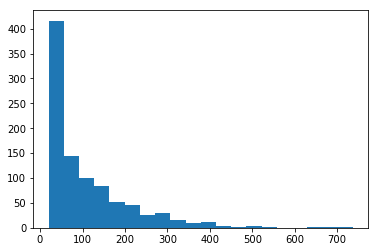

In [295]:
import matplotlib.pyplot as plt
temp_matrix = np.zeros(train_matrix.shape)
temp_matrix[train_matrix.nonzero()] = 1
num_rated_vector = np.sum(temp_matrix, axis =1)
plt.hist(num_rated_vector, bins = 20)
plt.show()

Set threshold = 50 by visualizing.

In [296]:
def cos_rec(train_matrix, base):
    if base == 'user':
        ########### your code goes here ###########
        temp_matrix = np.zeros(train_matrix.shape)
        temp_matrix[train_matrix.nonzero()] = 1
        uu_similarity = 1 - pairwise_distances(train_matrix, metric='cosine')
        normalizer = np.matmul(uu_similarity, temp_matrix)
        normalizer[normalizer==0] =1e-5
        predictionMatrix = np.matmul(uu_similarity, train_matrix)/normalizer


        useraverage = np.sum(train_matrix, axis=1)/(np.sum(temp_matrix, axis=1) + 1e-5)
        columns = np.sum(predictionMatrix, axis=0)
        predictionMatrix[:, columns==0] = predictionMatrix[:, columns==0] + np.expand_dims(useraverage, axis=1)
        return predictionMatrix


    elif base == 'item':
        ########### your code goes here ###########
        train_matrix = train_matrix.T
        temp_matrix = np.zeros(train_matrix.shape)
        temp_matrix[train_matrix.nonzero()] = 1
        ii_similarity = 1 - pairwise_distances(train_matrix, metric='cosine')
        normalizer = np.matmul(ii_similarity, temp_matrix)
        normalizer[normalizer==0] = 1e-5
        predictionMatrix = np.matmul(ii_similarity, train_matrix)/normalizer

        itemaverage = np.sum(train_matrix, axis=1)/(np.sum(temp_matrix, axis=1) + 1e-5)
        columns = np.sum(predictionMatrix, axis=0)
        predictionMatrix[:, columns==0] = predictionMatrix[:, columns==0] + np.expand_dims(itemaverage, axis=1)


        return predictionMatrix.T
def rmse(pred, test):
    # calculate RMSE for all the items in the test dataset
    predItems = pred[test.nonzero()].flatten() 
    testItems = test[test.nonzero()].flatten()
    return sqrt(mean_squared_error(predItems, testItems))

In [297]:
user_above50 = train_matrix[num_rated_vector>=50]
user_below50 = train_matrix[num_rated_vector<50]

In [298]:
user_above50_pred = cos_rec(user_above50, 'user')
user_below50_pred = cos_rec(user_below50, 'user')
item_above50_pred = cos_rec(user_above50, 'item')
item_below50_pred = cos_rec(user_below50, 'item')

In [299]:
rmse_user_above = rmse(user_above50_pred,user_above50)
rmse_user_below = rmse(user_below50_pred,user_below50)
rmse_item_above = rmse(item_above50_pred,user_above50)
rmse_item_below = rmse(item_below50_pred,user_below50)

In [300]:
print(rmse_user_above,
      rmse_user_below,
      rmse_item_above,
      rmse_item_below)

0.9509603392335239 0.8527198521391801 0.9841170334884106 0.8763846090384657


For both uu and ii filtering, the performance are better with users have fewer rating records. That's because for those users rated fewer movie, they tend to focus on certain type of movie, while the users that have more rating tend to have a broader taste of movies, thus it's hard to determine what type of movies are their favorite base on similarity.

# Validation

In [301]:
# Constants for validation only
ROW_NUM = 943
COL_NUM = 1682
RATING_COL = 'rating'

### dataPreprocessor

In [302]:
def testDataPreprocessor(path=MOVIELENS_DIR, getData=getData, getMatrix=CrossValidation.getMatrix):
    validation_df = getData(MOVIELENS_DIR, 'u1.test')
    try:
        matrix = getMatrix(validation_df, ROW_NUM, COL_NUM, RATING_COL)
    except:
        print('dataPreprocessor function has error')
        return
    try:
        assert(matrix.shape == (ROW_NUM,COL_NUM)),\
        "Shape of matrix{0} doesn't match predefined shape (943,1682)".format(matrix.shape)
    except Exception as e:
        print(e)
    return validation_df

In [303]:
validation_df = testDataPreprocessor()

## Baseline Recommendation Systems

### Popularity Based Recommendation

In [304]:
def testPopularityRecSys(validation_df=validation_df, BaseLineRecSys = BaseLineRecSys):
    popularity_recsys = BaseLineRecSys('popularity')
    try:
        popularity_recsys.predict_all(validation_df, ROW_NUM, COL_NUM)
    except Exception as e:        
        print('popularity function has error')
        print(e)
        return
    try:
        predictionMatrix = popularity_recsys.getModel()
        assert(predictionMatrix.shape == (ROW_NUM, COL_NUM)),\
        "Shape of matrix{0} doesn't match predefined shape ({1},{2})"\
        .format(predictionMatrix.shape,ROW_NUM, COL_NUM)
    except Exception as e:
        print(e)

In [305]:
testPopularityRecSys()

calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


### User Average Based Recommendation

In [306]:
def testUserAverRecSys(validation_df=validation_df, BaseLineRecSys = BaseLineRecSys):
    useraverage_recsys = BaseLineRecSys('average_user_rating')
    try:
        useraverage_recsys.predict_all(validation_df, ROW_NUM, COL_NUM)
    except:
        print('useraverage function has error')
        return
    try:
        predictionMatrix = useraverage_recsys.getModel()
        assert(predictionMatrix.shape == (ROW_NUM, COL_NUM)),\
        "Shape of matrix{0} doesn't match predefined shape ({1},{2})"\
        .format(predictionMatrix.shape,ROW_NUM, COL_NUM)
    except Exception as e:
        print(e)

In [307]:
testPopularityRecSys()

calculated 0 users
calculated 100 users
calculated 200 users
calculated 300 users
calculated 400 users
calculated 500 users
calculated 600 users
calculated 700 users
calculated 800 users
calculated 900 users


## Similary Based Recommendation Systems

### Euclidean Similarity Function

In [308]:
def testEuclidean(validation_df=validation_df, getMatrix=CrossValidation.getMatrix):
    matrix = getMatrix(validation_df, ROW_NUM, COL_NUM, RATING_COL)
    try:
        sim_matrix = SimBasedRecSys.euclidean(matrix)
        assert(sim_matrix.shape == (ROW_NUM, ROW_NUM)),\
        "Shape of matrix{0} doesn't match predefined shape ({1},{2})"\
        .format(sim_matrix.shape,ROW_NUM,ROW_NUM)
        assert(np.any(sim_matrix <= 1)),\
               "Exist similarity value that is not less or equal to 1."
    except Exception as e:
        print(e)        

In [309]:
testEuclidean()

### Customized Similarity Function (test somethingelse function)

In [310]:
def testCustomizedSim(validation_df=validation_df, getMatrix=CrossValidation.getMatrix):
    matrix = getMatrix(validation_df, ROW_NUM, COL_NUM, RATING_COL)
    try:
        sim_matrix = SimBasedRecSys.somethingelse(matrix)
        assert(sim_matrix.shape == (ROW_NUM, ROW_NUM)),\
        "Shape of matrix{0} doesn't match predefined shape ({1},{2})"\
        .format(sim_matrix.shape,ROW_NUM,ROW_NUM)
        assert(np.any(sim_matrix <= 1)),\
               "Exist similarity value that is not less or equal to 1."
    except Exception as e:
        print(e) 

In [311]:
testCustomizedSim()

### User-User Similarity Based Recommendation System

In [312]:
def testUUSimBasedRecSys(validation_df=validation_df, dataPreprocessor=dataPreprocessor):
    try:
        user_cosine_recsys = SimBasedRecSys('user','cosine', dataPreprocessor)
    except:
        print("Framework error, please contact TA if you see this.")
        return
    
    try:
        user_cosine_recsys.predict_all(validation_df, ROW_NUM, COL_NUM)
        predictionMatrix = user_cosine_recsys.getModel()
        assert(predictionMatrix.shape == (ROW_NUM, COL_NUM)),\
        "Shape of matrix{0} doesn't match predefined shape ({1},{2})"\
        .format(predictionMatrix.shape,ROW_NUM, COL_NUM)
    except Exception as e:
        print(e)

In [313]:
testUUSimBasedRecSys()

### Item-Item Similarity Based Recommendation System

In [314]:
def testIISimBasedRecSys(validation_df=validation_df, dataPreprocessor=dataPreprocessor):
    try:
        user_cosine_recsys = SimBasedRecSys('item','cosine', dataPreprocessor)
    except:
        print("Framework error, please contact TA if you see this.")
        return
    
    try:
        user_cosine_recsys.predict_all(validation_df, ROW_NUM, COL_NUM)
        predictionMatrix = user_cosine_recsys.getModel()
        assert(predictionMatrix.shape == (ROW_NUM, COL_NUM)),\
        "Shape of matrix{0} doesn't match predefined shape ({1},{2})"\
        .format(predictionMatrix.shape,ROW_NUM, COL_NUM)
    except Exception as e:
        print(e)

In [315]:
testIISimBasedRecSys()